In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def str2msec(timestamp: str, ms=False):
    hours, minutes, seconds, milliseconds = map(int, timestamp.split(":"))
    total = (hours * 60 * 60) + (minutes * 60) + (seconds) + milliseconds/10000
    if ms:
        return total*1000
    else:
        return int(total*10)/10

In [3]:
CSV_PATH = "Keynect pro 1.csv"
data = pd.read_csv(CSV_PATH, index_col=None)

In [4]:
vbo = pd.read_csv('Keynect_ProMaster_0001_RAW.csv')

In [5]:
CAN_ID_LIST = np.unique(data['CAN ID'])
data['Time_ms'] = [str2msec(i) for i in data['Time']]
TIME_LIST = np.unique(data['Time_ms'])

In [6]:
vbo['Traffic_kB/s'] = [0] * len(vbo['time'])
vbo['Traffic_msgs/s'] = [0] * len(vbo['time'])
for id in CAN_ID_LIST:
    vbo[id] = [0] * len(vbo['time'])

In [7]:
Traffic_byte = []
Traffic_msgs = []


for t in TIME_LIST:
    tmp = data[data['Time_ms']==t]
    Traffic_byte.append(np.sum(tmp['DLC'])/100)
    Traffic_msgs.append(len(tmp['Time_ms']))


Text(0, 0.5, 'Traffic [kB/s]')

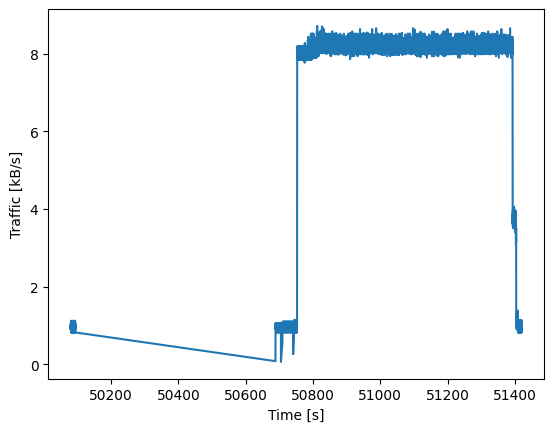

In [8]:
plt.plot(TIME_LIST, Traffic_byte)
plt.xlabel('Time [s]')
plt.ylabel('Traffic [kB/s]')

In [9]:
vbo_t = np.array(vbo['time'])
for i,_ in enumerate(vbo_t):
    vbo_t[i] = np.round(vbo_t[0] + i * 0.1,1)
vbo_v = np.array(vbo['IVT_Result_U1'])

t_max_can = TIME_LIST[np.argmax(np.diff(Traffic_byte))]
t_max_vbo = vbo_t[np.argmax(np.diff(vbo_v))]
print(t_max_can, t_max_vbo)

50752.7 3742.9


In [10]:
data['Time_ms'] += t_max_vbo - t_max_can
data['Time_ms'] = np.round(data['Time_ms'], 1)
TIME_LIST += t_max_vbo - t_max_can
TIME_LIST = np.round(TIME_LIST, 1)


In [11]:
for id in CAN_ID_LIST:
    tmp = data[data['CAN ID'] == id]
    lookup = dict(zip(tmp['Time_ms'], tmp['DLC']))
    vbo[id] = [lookup.get(val, 0) for val in vbo_t]

lookup = dict(zip(list(TIME_LIST), Traffic_byte))
vbo['Traffic_kB/s'] = [lookup.get(val, 0) for val in vbo_t]
lookup = dict(zip(TIME_LIST, Traffic_msgs))
vbo['Traffic_msgs/s'] = [lookup.get(val, 0) for val in vbo_t]
        

In [ ]:
lookup

In [ ]:
for id in CAN_ID_LIST:
    plt.figure()
    plt.plot(vbo['time'], vbo[id])
    plt.title(id)

C:\Users\19063\AppData\Local\Temp\ipykernel_30672\1414660797.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


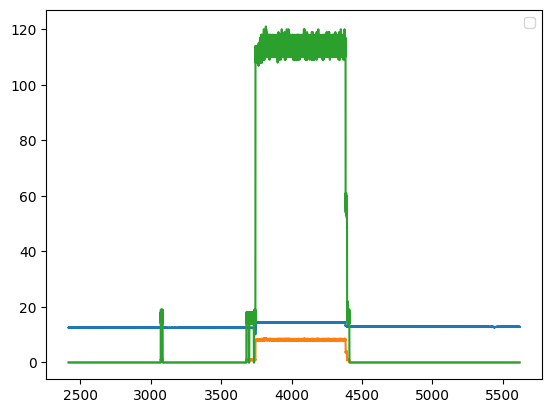

In [ ]:
plt.plot(vbo['time'], np.array(vbo['IVT_Result_U1'])/1000)
# plt.plot(np.array(vbo['time']), np.array(vbo['IVT_Result_U1'])/1000)
plt.plot(vbo['time'], vbo['Traffic_kB/s'])
plt.plot(vbo['time'], vbo['Traffic_msgs/s'])
plt.legend()
# plt.xlim([4400, 4800])

In [ ]:
plt.plot(Traffic_msgs)

In [16]:
vbo.columns

Index(['sats', 'time', 'lat', 'long', 'velocity', 'heading', 'height',
       'vert-vel', 'Tsample', 'solution_type', 'avifileindex', 'avitime',
       'IVT_Result_U1', 'IVT_Result_I', 'Traffic_kB/s', 'Traffic_msgs/s',
       '0x10A000', '0x10A001', '0x10A006', '0x14DA40F1', '0x17FC007C',
       '0x18DA00F1', '0x18DA01F1', '0x18DA10F1', '0x18DA17FA', '0x18DA1FF1',
       '0x18DA21FA', '0x18DA24F1', '0x18DA27FA', '0x18DA40F1', '0x18DA60F1',
       '0x18DA60F4', '0x18DA61F2', '0x18DA98F1', '0x18DAC7F1', '0x18DACBF1',
       '0x18DADAF1', '0x18DAF110', '0x18DAF140', '0x18DB33F1', '0x1DD01801',
       '0x1DD01A01', '0x210A006', '0x218A006', '0x28A006', '0x3080900',
       '0x3080B00', '0x38A00C', '0x618A001', '0x628A001', '0x700', '0x701',
       '0x7039306', '0x710', '0x711', '0x714', '0x715', '0x720', '0x721',
       '0x726', '0x730', '0x737', '0x740', '0x743', '0x745', '0x752', '0x7A1',
       '0x7C3', '0x7D1', '0x7D2', '0x7DF', '0x7E0', '0x7E2', '0x7E3', '0x7E4',
       '0x7E5', '0x7E6

In [5]:
import glob
import pandas as pd
import numpy as np
import os

In [7]:
MAIN_DIR = r'G:\Shared drives\APS LABS - ACM Partnership\(1b) Projects\20241112.Amazon - XX\Keynect'
csv_files = glob.glob(MAIN_DIR+'/**/*.csv', recursive=True)
ID_dict = {}
for f in csv_files:
    log = pd.read_csv(f)
    key = os.path.basename(f)
    ID_dict[key] = np.unique(log['CAN ID'])
print(ID_dict)




{'Keynect Sprinter 1.csv': array(['0x020', '0x021', '0x02F', '0x03D', '0x068', '0x071', '0x075',
       '0x077', '0x087', '0x08F', '0x094', '0x095', '0x096', '0x098',
       '0x0A1', '0x0A3', '0x0AE', '0x0B1', '0x0B3', '0x10DC0000',
       '0x10E00000', '0x10E40000', '0x10F80000', '0x122', '0x12E',
       '0x137', '0x13B', '0x141', '0x145', '0x147', '0x149', '0x14B',
       '0x14D', '0x151', '0x15A', '0x16C', '0x182', '0x187', '0x18EF0900',
       '0x18EF4100', '0x18EF5800', '0x18EF5A00', '0x18EF5C00',
       '0x18EF8200', '0x18EF8500', '0x18EF8700', '0x192', '0x1E1',
       '0x1E5', '0x1E9', '0x1EE', '0x225', '0x22B', '0x2B9', '0x2C0',
       '0x2C4', '0x2C6', '0x2CF', '0x2DE', '0x2E3', '0x2F0', '0x2F1',
       '0x2F3', '0x2F5', '0x2F7', '0x2FB', '0x2FE', '0x307', '0x309',
       '0x30B', '0x30F', '0x31A', '0x320', '0x328', '0x32C', '0x32E',
       '0x335', '0x337', '0x339', '0x33D', '0x341', '0x34B', '0x34D',
       '0x350', '0x351', '0x353', '0x357', '0x361', '0x369', '0x370',
     

In [16]:
ID_pool = []
for key in ID_dict:
    for id in ID_dict[key]:
        if id not in ID_pool:
            ID_pool.append(id)

ID_pool = np.sort(ID_pool)
print(ID_pool)

['0x010' '0x020' '0x021' '0x02F' '0x03D' '0x04A' '0x04B' '0x050' '0x068'
 '0x071' '0x075' '0x077' '0x087' '0x08F' '0x091' '0x094' '0x095' '0x096'
 '0x098' '0x0A1' '0x0A3' '0x0AE' '0x0B1' '0x0B3' '0x10A000' '0x10A001'
 '0x10A006' '0x10DC0000' '0x10E00000' '0x10E40000' '0x10F80000' '0x111'
 '0x113' '0x115' '0x117' '0x118' '0x119' '0x121' '0x122' '0x123' '0x12E'
 '0x137' '0x13B' '0x140' '0x141' '0x145' '0x147' '0x149' '0x14A' '0x14B'
 '0x14D' '0x14DA40F1' '0x151' '0x15A' '0x16C' '0x170' '0x17FC007C' '0x182'
 '0x187' '0x18DA00F1' '0x18DA01F1' '0x18DA10F1' '0x18DA17FA' '0x18DA1FF1'
 '0x18DA21FA' '0x18DA24F1' '0x18DA27FA' '0x18DA40F1' '0x18DA60F1'
 '0x18DA60F4' '0x18DA61F2' '0x18DA98F1' '0x18DAC7F1' '0x18DACBF1'
 '0x18DADAF1' '0x18DAF110' '0x18DAF140' '0x18DB33F1' '0x18EF0900'
 '0x18EF1100' '0x18EF4100' '0x18EF5800' '0x18EF5900' '0x18EF5A00'
 '0x18EF5C00' '0x18EF8200' '0x18EF8500' '0x18EF8700' '0x192' '0x1DD01801'
 '0x1DD01A01' '0x1E1' '0x1E5' '0x1E9' '0x1EE' '0x2001' '0x210A006' '0x211'
 '0

In [21]:
indic = {}
indic['CAN ID']=ID_pool
for key in ID_dict:
    val = []
    for id in ID_pool:
        if id in ID_dict[key]:
            val.append(1)
        else:
            val.append(0)
    indic[key] = val
csv = pd.DataFrame(indic)
csv.to_csv('summary.csv', index=None)